# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.isna().sum()

label      0
review    35
dtype: int64

In [7]:
# Remove NaN values from review
df = df.dropna()

In [8]:
df.isna().sum()

label     0
review    0
dtype: int64

In [20]:
# Check if any reviews are blank strings
df['review'].str.isspace().sum()

27

In [21]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [23]:
df = df[~df['review'].str.isspace()] # ~ means inverse

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [36]:
# Check the label values
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words
* get the top 20 words per label type

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
neg_review = df[df['label']=='neg']['review']
pos_review = df[df['label']=='pos']['review']

In [53]:
cv = CountVectorizer(stop_words='english')
cv = cv.fit(neg_review)

In [64]:
bag_of_words = cv.fit_transform(neg_review)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
neg_bag = sorted(words_freq, key=lambda x: x[1], reverse=True)[0:20]

Top 20 words used for Negative review


In [67]:
print('Top 20 words used for Negative review')
neg_bag[:20]

Top 20 words used for Negative review


[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

In [68]:
cv = CountVectorizer(stop_words='english')
cv = cv.fit(pos_review)
bag_of_words = cv.fit_transform(pos_review)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
pos_bag = sorted(words_freq, key=lambda x: x[1], reverse=True)[0:20]

In [70]:
print('Top 20 words used for Positive review')
pos_bag[:20]

Top 20 words used for Positive review


[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

### Training and Data
* Split the data into features and a label

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X = df['review']
y = df['label']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=101)

* Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model. 

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression())])

In [90]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('log', LogisticRegression())])

In [91]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [92]:
preds = pipe.predict(X_test)

In [93]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



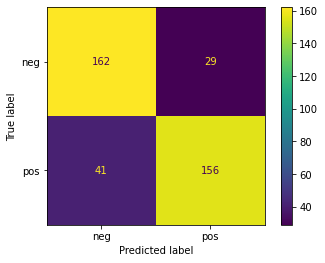

In [94]:
plot_confusion_matrix(pipe, X_test, y_test)